# Earth's lithospheric motions

### Author(s), contact(s), and dates:
- Author: Valentina Espinoza Fernández (University of Copenhagen)
- Email:  vf@ign.ku.dk
- Date:   17th of January 2024

## Exercise 4: Surface velocities from geological and geodetic kinematic models

In Exercise 3 we worked with a set of Euler vectors belonging to the **REVEL--2000** model  [Sella et al., 2002], which we learned is a kinematic model of *geodesic type*. That means that estimates come from geodetic data, collected between the years 1993 and 2000. These Euler vectors describe the average GPS velocities between the years 1993--2000, or what is essentially, the present--day motion of plates. Note that plate motions are expressed relative to the ITRF97 reference system, but this is not particularly relevant for the exercise.

We will also work with a second set of Euler vectors, extracted from the global model of plate kinematics **MORVEL** [DeMets et al., 2010]. This model is of *geological type*, in the sense that it describes the relative motion of different pairs of tectonic plates according to the most recent magnetic reversal in geological history (depending on the pair of plates, the reversal used could be the one at 0.78 or 3.16 million years ago). 

For both models, covariance matrices are provided, which allow quantifying the uncertainty of the given average Euler vectors. For the sake of time, we will not work with those. 


Perform the following exercises:

1. Choose a geographic location within a tectonic plate. Using data from the MORVEL and REVEL models, calculate the surface velocity at that point relative to another *reference* plate. For reference plates, it is suggested to use plates such as Nubia, Antarctica or North America, since these are large and generally move slower over time. 

2. Perform the same operation but for four other points belonging to four other different plates. 

3. Plot the magnitude of the velocity vectors calculated from the REVEL and MORVEL models as follows: in the *x-axis* plot the magnitude of the velocities estimated with MORVEL, and REVEL estimates in the *y-axis*. From this graph, evaluate whether velocity estimates made from magnetic anomalies (MORVEL) or GPS data (REVEL) are comparable. What implications do these results have? 

4. Make another graph: place *time* in the x-axis, for a range from present-day to 3.16 million years. The vertical axis will have the magnitude of the surface velocities estimated from MORVEL and REVEL. Note that MORVEL velocities represent an average value over the last 3.16 million years, while REVEL velocities an average between the years 1993 and 2000 (virtually instantaneous velocities). In this graph plot the MORVEL velocities with an horizontal line and the REVEL velocities as a point.

5. With all of these information, how do the REVEL and MORVEL measurements compare? Do you find significant differences? How can these results be interpreted? 

<br>

***
References:  
- G. F. Sella, T. H. Dixon, and A. Mao. *Revel: A model for recent plate velocities from space geodesy.* Journal of Geophysical Research, 107:B42081, 2002.
- C. DeMets, R. G. Gordon, and D. F. Argus. Geologically current plate motions. Geophysical Journal International, 181: 1–80, 2010

<br>


Notes: 
- The vectors of the MORVEL model already yield the motion between pairs of plates, while those of REVEL are relative to the ITRF97. For REVEL, you will have to calculate the relative motion between different pairs of plates taking into account that: 
$$\omega_{A/B} = \omega_{A/ITRF} - \omega_{B/ITRF}$$

- The MORVEL and REVEL Euler vectors are expressed in spherical and Cartesian coordinates, respectively. Perform conversions with caution, with special attention to units of measure (degrees vs radians, cm/yr vs mm/yr, etc). 

In [168]:
# Public dependencies
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [169]:
# Online dependencies - GOOGLE DRIVE
#from google.colab import drive
#drive.mount('/content/gdrive')
#path_to_SCRIPTS = '/content/gdrive/MyDrive/2024-Geodynamics/01_PLATE_MOTIONS/SCRIPTS'


# Local dependencies - YOUR COMPUTER
path_to_SCRIPTS = os.getcwd() 


path_to_data = os.path.join(path_to_SCRIPTS, "DATA")
path_to_modules = os.path.join(path_to_SCRIPTS, "DEPENDENCIES")
if not path_to_modules in sys.path: sys.path.append(path_to_modules)
if not path_to_data in sys.path: sys.path.append(path_to_data)


from surfvel_dependencies import sph2cart, ev_to_surfvel_total

The objective of this exercise is to compare the velocities obtained from the REVEL model (geodetic data) with the velocities from MORVEL (geological data).

We start by uploading the Euler vectors of the MORVEL (DeMets et al., 2010) and REVEL (Sella et al., 2002) models:

In [170]:
revel_path = os.path.join(path_to_data, "REVEL_SELLA2002_TABLE3.txt")
revel_ev_df = pd.read_csv(revel_path, delimiter=' ', index_col=0)

morvel_path = os.path.join(path_to_data, "MORVEL_DEMETS2010_TABLE1.txt")
morvel_ev_df = pd.read_csv(morvel_path, delimiter=' ', index_col=0)
morvel_ev_df

,NData,lat_degN,lon_degE,om_degMyr,a,b,c,d,e,f
PlatePair,,,,,,,,,,
AU-AN,167/19/0,11.3,41.8,0.633,2.60,1.85,0.97,2.18,0.18,1.04
CP-AN,35/1/0,17.2,32.8,0.580,55.09,30.12,-61.66,116.24,-52.93,81.69
LW-AN,16/6/0,-1.2,-33.6,0.133,3.06,2.29,-3.67,2.17,-3.11,4.86
NB-AN,59/4/0,-6.2,-34.3,0.158,2.25,0.48,-2.50,0.36,-0.72,3.22
NZ-AN,60/21/0,33.1,-96.3,0.477,0.11,0.34,-0.25,6.67,1.27,4.94
PA-AN,48/10/0,-65.1,99.8,0.870,0.81,1.00,0.13,3.62,-1.19,3.60
SM-AN,29/2/0,11.2,-56.7,0.140,1.89,3.41,-2.07,7.55,-4.54,3.33
EU-NA,453/5/0,61.8,139.6,0.210,0.18,-0.13,-0.07,0.14,0.07,0.13
NB-NA,161/4/0,79.2,40.2,0.233,0.95,-0.74,0.55,0.76,-0.43,0.66


REVEL data is in Cartesian coordinates (rad/Myr), while MORVEL data is in spherical coordinates (lat-lon in degrees). For the steps that will follow, it is convenient for us to standardize our data, that is: an array of 3 elements, the cartesian coordinates expressed in degrees/Myr. 

We will create the functions `revel_to_cart_degMyr` and `morvel_to_cart_degMyr` to automate the standardization work.

In [171]:
# REVEL data
def revel_to_cart_degMyr(plate):
    
    # Euler vector from [rad/Myr] to [deg/Myr]
    revel_cart = revel_ev_df.loc[plate][["wX", "wY", "wZ"]] * (180/np.pi)
    return revel_cart

    
revel_Nz = revel_to_cart_degMyr("Nz")
revel_An = revel_to_cart_degMyr("An")
revel_An

wX   -0.081992
wY   -0.084891
wZ    0.192418
Name: An, dtype: float64

In [172]:
# MORVEL data
def morvel_to_cart_degMyr(plate_pair):
    
    # Euler vector from spherical to cartesian
    morvel_vec = morvel_ev_df.loc[plate_pair]
    wX, wY, wZ = sph2cart(morvel_vec["lon_degE"], morvel_vec["lat_degN"], morvel_vec["om_degMyr"])
    morvel_cart = pd.Series({"wX": wX, "wY": wY, "wZ": wZ})

    return morvel_cart


morvel_NzAn = morvel_to_cart_degMyr("NZ-AN")
morvel_NzAn

wX   -0.043849
wY   -0.397179
wZ    0.260491
dtype: float64

In [173]:
revel_NzAn = revel_Nz - revel_An
revel_NzAn

wX    0.005794
wY   -0.370733
wZ    0.260806
dtype: float64

In [174]:
sv_NzAn_revel = ev_to_surfvel_total(revel_NzAn, pnt_lon=0.0, pnt_lat=0.0)   # Fill with your own lon-lat coordinates!
sv_NzAn_morvel = ev_to_surfvel_total(morvel_NzAn, pnt_lon=0.0, pnt_lat=0.0)  

print(f"REVEL surface velocity: {sv_NzAn_revel:.2f} cm/yr")
print(f"MORVEL surface velocity: {sv_NzAn_morvel:.2f} cm/yr")

REVEL surface velocity: 5.04 cm/yr
MORVEL surface velocity: 5.28 cm/yr


How do these two results compare? Now try for a couple more Euler vectors and plot the results.

In [175]:
plate_pairs = ["NZ-AN", "NZ-PA"]        # Fill with you own list of plate pairs!
lonlats = [(0, 0), (0, 0)]              # Fill with your own lon-lat coordinates!


# Here we will store the results
sv_revel_df = pd.DataFrame()
sv_morvel_df = pd.DataFrame()

# We will iterate over each plate-pair and point
for plate_pair, lonlat in zip(plate_pairs, lonlats):
    
    # Establish the plate keys
    moving_plate, reference_plate = plate_pair.split('-')
    moving_plate = moving_plate[0] + moving_plate[1].lower()
    reference_plate = reference_plate[0] + reference_plate[1].lower()
    
    # REVEL data
    revel_ev_moving = revel_to_cart_degMyr(moving_plate)
    revel_ev_fixed = revel_to_cart_degMyr(reference_plate)
    revel_ev = revel_ev_moving - revel_ev_fixed

    # MORVEL data
    morvel_ev = morvel_to_cart_degMyr(plate_pair)

    # Surface velocity calculations
    sv_revel = ev_to_surfvel_total(revel_ev, lonlat[0], lonlat[1])
    sv_morvel = ev_to_surfvel_total(morvel_ev, lonlat[0], lonlat[1])  
    
    # Store the results
    sv_revel_df[plate_pair] = dict(lon = lonlat[0], lat = lonlat[1], v_total = np.round(sv_revel, 2))
    sv_morvel_df[plate_pair] = dict(lon = lonlat[0], lat = lonlat[1], v_total = np.round(sv_morvel, 2))

In [176]:
sv_revel_df

,NZ-AN,NZ-PA
lon,0.00,0.00
lat,0.00,0.00
v_total,5.04,14.09


In [177]:
sv_morvel_df

,NZ-AN,NZ-PA
lon,0.00,0.00
lat,0.00,0.00
v_total,5.28,14.74


We can compare these results on a MORVEL vs REVEL chart. Consider including a diagonal line that allows you to evaluate the 1:1 relationship of both axes (y=x).

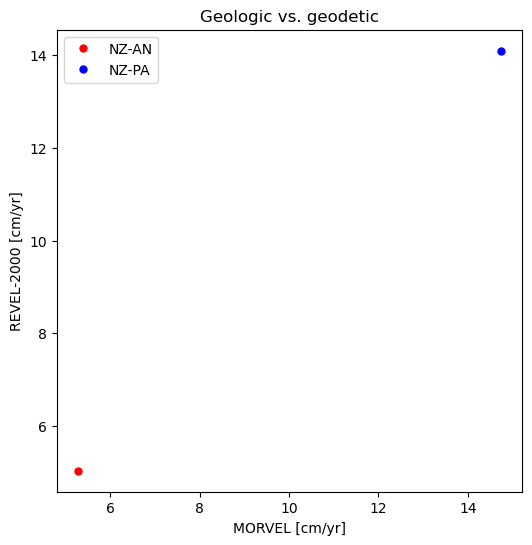

In [178]:
revel_vel = sv_revel_df.loc["v_total"]
morvel_vel = sv_morvel_df.loc["v_total"]

# Create figure
fig, ax = plt.subplots(figsize =(6,6)) 
ax.set(title = "Geologic vs. geodetic",
          xlabel = "MORVEL [cm/yr]",
          ylabel = "REVEL-2000 [cm/yr]",
          #xlim=[0, 15],
          #ylim=[0, 15],
          )


# Plot data
color_list = ['r', 'b', 'g', 'orange', 'purple']    # If you chose to plot more than five datasets, you will need to add more colors!

for plate_pair, color in zip(plate_pairs, color_list):
    ax.plot(morvel_vel[plate_pair], revel_vel[plate_pair], 'o', color=color, markersize=5, label=plate_pair)

#ax.plot([0, 1], [0, 1], '-k', label="linear trend", lw=0.6)
ax.legend();

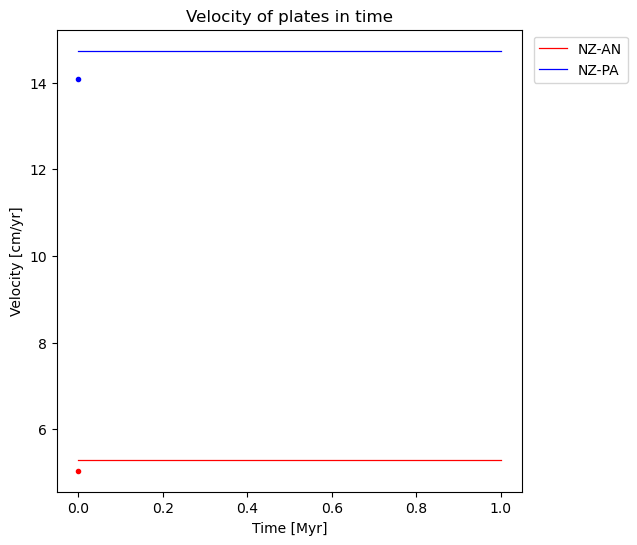

In [179]:
fig, ax = plt.subplots(figsize =(6,6)) 
ax.set(title = "Velocity of plates in time",
       xlabel = "Time [Myr]",
       ylabel = "Velocity [cm/yr]")


validity_time = [1.0, 1.0, 1.0, 1.0, 1.0]     # Fill with the "validity" time for each MORVEL Euler vector (0.78 or 3.16)

for plate_pair, time, color in zip(plate_pairs, validity_time, color_list):
    
    ax.plot([0.0, time], [morvel_vel[plate_pair], morvel_vel[plate_pair]], '-',  label=plate_pair, lw=0.9, color=color)
    ax.plot(0.0, revel_vel[plate_pair], 'o',  markersize=3, color=color)
    

ax.legend(bbox_to_anchor=(1.01, 1.0));

To dwell on: 

How sensible are your results to the choice of observation point? Do you expect the differences to exacerbate if you choose a point closer to a plate boundary? Or perhaps the distance to Euler-pole position is more relevant?